<a href="https://colab.research.google.com/github/Vaibhav21pandit/Pytorch_Rally/blob/master/Torch_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following cell downloads MNIST images as numpy arrays and converts to Torch_tensors-> dataset->dataLoader 

In [ ]:
import torch
from torch import nn,optim
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,TensorDataset
import matplotlib.pyplot as plt

In [ ]:
import gzip
import pickle
!wget "http://deeplearning.net/data/mnist/mnist.pkl.gz"
with gzip.open(('./mnist.pkl.gz'), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

--2020-09-19 10:31:42--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz.3’

mnist.pkl.gz.3      100%[===================>]  15.42M  8.89MB/s    in 1.7s    

2020-09-19 10:31:44 (8.89 MB/s) - ‘mnist.pkl.gz.3’ saved [16168813/16168813]



In [ ]:
(x_train, y_train, x_valid, y_valid)=(map(torch.tensor,(x_train, y_train, x_valid, y_valid)))

data={
    'train':torch.utils.data.TensorDataset(x_train,y_train),
    'val':TensorDataset(x_valid,y_valid)
}
dataloader={
    'train':DataLoader(data['train'],100,shuffle=True),
    'val':DataLoader(data['val'],50)
}

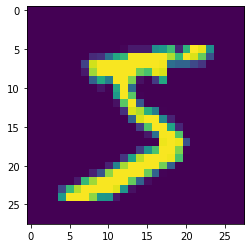

In [ ]:
plt.imshow(x_train[0].reshape((28,28)))

Autoencoder with MNIST

In [ ]:
#refer to https://medium.com/pytorch/implementing-an-autoencoder-in-pytorch-19baa22647d1 For details
# defining the AutoEncoder in single class
class AE(nn.Module):
  def __init__(self,**kwargs):
    super().__init__()
    self.encode1=nn.Linear(kwargs['input_shape'],324)
    self.encode2=nn.Linear(324,128)
    self.decode1=nn.Linear(128,324)
    self.decode2=nn.Linear(324,kwargs['input_shape'])

  def forward(self,x):
    x=self.encode1(x)
    x=torch.relu(x)
    x=torch.relu(self.encode2(x))
    x=torch.relu(self.decode1(x))
    x=torch.relu(self.decode2(x))
    # x=torch.relu(x)
    return x
model=AE(input_shape=784).cuda()


In [ ]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

In [ ]:
def Train(num_epochs=15):
  for i in range(num_epochs):
    val_loss=0
    for inputs,_ in dataloader['train']:
      inputs=inputs.view(-1,784)
      inputs=inputs.cuda()
      outputs=model(inputs).cuda()
      loss=criterion(outputs,inputs)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      with torch.no_grad():
        model.eval()
        for input_batch,_ in dataloader['val']:
          input_batch=input_batch.view(-1,784)
          input_batch=input_batch.cuda()
          result=model(input_batch).cuda()
          val_batch_loss=criterion(result,input_batch)
          val_loss+=val_batch_loss
    print(val_loss) 


In [ ]:
Train()

tensor(4720.2422, device='cuda:0')
tensor(3595.6946, device='cuda:0')
tensor(3496.4675, device='cuda:0')
tensor(3457.5222, device='cuda:0')
tensor(3431.4888, device='cuda:0')
tensor(3418.8247, device='cuda:0')
tensor(3390.3662, device='cuda:0')
tensor(3386.8899, device='cuda:0')
tensor(3375.7131, device='cuda:0')
tensor(3380.0513, device='cuda:0')
tensor(3375.5291, device='cuda:0')
tensor(3370.1040, device='cuda:0')
tensor(3368.9990, device='cuda:0')
tensor(3366.7317, device='cuda:0')
tensor(3368.2598, device='cuda:0')


In [ ]:
torch.save(model.state_dict,'./AE_MNIST.pth')

In [ ]:
for inputs,_ in dataloader['val']:
  inputs=inputs.cuda()
  



In [ ]:
result=model(inputs[0])
result=result.cpu().detach().numpy()
result=result.reshape((28,28))
result.shape

(28, 28)

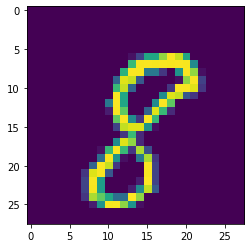

In [ ]:
original=inputs[0].cpu().detach().numpy()
original=original.reshape((28,28))
plt.imshow(original)

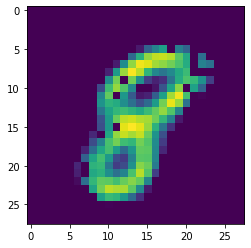

In [ ]:
plt.imshow(result)

Variational Autoencoder with MNIST

In [ ]:
#the difference between a simple autoencoder and VAE lies in the fact that while an AE 
#simply reproduces the input images fron the encoded latent vector space. VAEs are able to produce varied images 
#from the encoded latent space

In [ ]:
class VAE():
  def __init__(self,**kwargs):
    super(self,VAE).__init__():
    self.encode1=nn.Linear(kwargs['input_shape'],324)
    self.encode2=nn.Linear(324,128)
    self.decode1=nn.Linear(128,324)
    self.decode2=nn.Linear(324,kwargs['input_shape'])

    def reparameterize(self, mu, log_var):
      """
      :param mu: mean from the encoder's latent space
      :param log_var: log variance from the encoder's latent space
      """
      std = torch.exp(0.5*log_var) # standard deviation
      eps = torch.randn_like(std) # `randn_like` as we need the same size
      sample = mu + (eps * std) # sampling as if coming from the input space
      return sample
    
  
    def forward(self, x):
      # encoding
      x = F.relu(self.enc1(x))
      x = self.enc2(x)
      # get `mu` and `log_var`
      mu = x
      log_var = x
      # get the latent vector through reparameterization
      z = self.reparameterize(mu, log_var)

      # decoding
      x = F.relu(self.dec1(z))
      reconstruction = torch.sigmoid(self.dec2(x))
      return reconstruction, mu, log_var

model=VAE(input_features=784)

GANs with PyTorch

In [ ]:
#GANs consist of 2 parts Generator and a discriminator,where input to the generator is random noise and it outputs some
#random stuff for  the first time,the input to discriminator is the image we want to generate,we iteratively take the output  

In [ ]:
#GANs
#Style Transfer
#BBox segmentation/Instance Segmentation/U-Net
#Detection
